In [54]:
import numpy as np
import math
import matplotlib.pyplot as plt

# <center> Домашнее задание №2 </center>
#### Выполнил: Мартиросян Арутюн Артушович, группа ВВО-19

## <center> Моделирование движения системы двух тел $ m_{1} $ и $ m_{2} $, взамодействующих между собой под действием силы тяготения </center>

Уравнения движения системы двух тел с массами $ m_{1} $ и $ m_{2} $, взаимодействующих  между собой под действием силы тяготения:

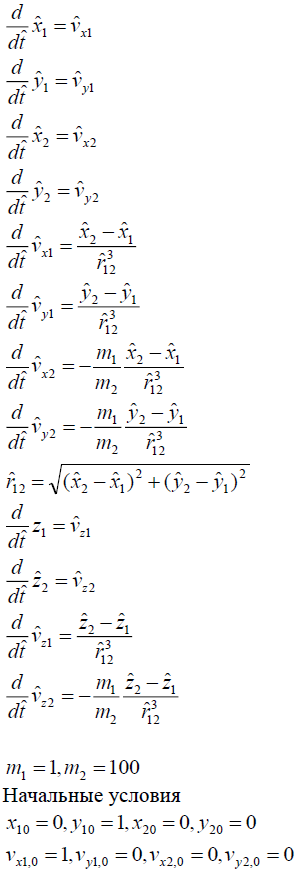

In [55]:
from IPython.display import Image
Image(filename='task2_equations(pic1).PNG', width=300, height=100)

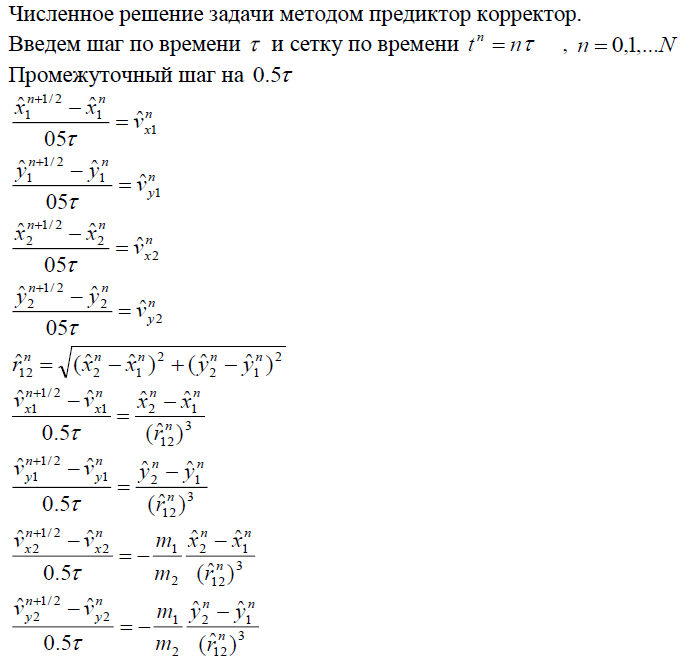

In [56]:
Image(filename='task2_num_solution(pic2).PNG', width=600, height=200)

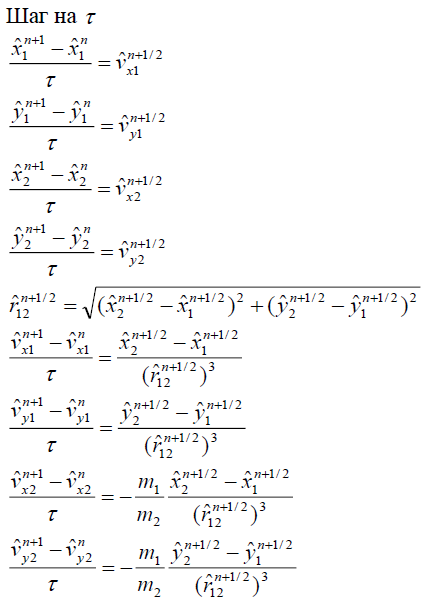

In [57]:
Image(filename='task2_num_solution(pic3).PNG', width=400, height=200)

In [58]:
# функция численного решения задачи
def PredictorCorrector_method (m_1, m_2, init_coord, init_velocity, tau, T):
    n = int(round(T/tau))
    t = np.linspace(0, n * tau, n + 1)
    
    x_1 = np.zeros(n + 1)     # инициализация координаты 1 тела на ось X
    y_1 = np.zeros(n + 1)     # инициализация координаты 1 тела на ось Y
    x_2 = np.zeros(n + 1)     # инициализация координаты 1 тела на ось X
    y_2 = np.zeros(n + 1)     # инициализация координаты 1 тела на ось Y
    
    Vx_1 = np.zeros(n + 1)    # инициализация проекции скорости 1 тела на ось X
    Vy_1 = np.zeros(n + 1)    # инициализация проекции скорости 1 тела на ось Y
    Vx_2 = np.zeros(n + 1)    # инициализация проекции скорости 2 тела на ось X
    Vy_2 = np.zeros(n + 1)    # инициализация проекции скорости 2 тела на ось Y
    
    x_1[0] = init_coord[0]
    y_1[0] = init_coord[1]
    x_2[0] = init_coord[2]
    y_2[0] = init_coord[3]
    
    Vx_1[0] = init_velocity[0]
    Vy_1[0] = init_velocity[1]
    Vx_2[0] = init_velocity[2]
    Vy_2[0] = init_velocity[3]
    
    for i in range(n):
        predx_1 = 0.5 * tau * Vx_1[i] + x_1[i]
        predy_1 = 0.5 * tau * Vy_1[i] + y_1[i]
        predx_2 = 0.5 * tau * Vx_2[i] + x_2[i]
        predy_2 = 0.5 * tau * Vy_2[i] + y_2[i]
        
        r_12 = math.sqrt((x_2[i] - x_1[i]) ** 2 + (y_2[i] - y_1[i]) ** 2)
        predr_12 = math.sqrt((predx_2 - predx_1) ** 2 + (predy_2 - predy_1) ** 2)
        
        predVx_1 = 0.5 * tau * (x_2[i] - x_1[i]) / (r_12) ** 3 + Vx_1[i]
        predVy_1 = 0.5 * tau * (y_2[i] - y_1[i]) / (r_12) ** 3 + Vy_1[i]
        predVx_2 = -0.5 * tau * m_1 / m_2 * (x_2[i] - x_1[i]) / (r_12) ** 3 + Vx_2[i]
        predVy_2 = -0.5 * tau * m_1 / m_2 * (y_2[i] - y_1[i]) / (r_12) ** 3 + Vy_2[i]
        
        x_1[i + 1] = tau * predVx_1 + x_1[i]
        y_1[i + 1] = tau * predVy_1 + y_1[i]
        x_2[i + 1] = tau * predVx_2 + x_2[i]
        y_2[i + 1] = tau * predVy_2 + y_2[i]
        
        Vx_1[i + 1] = tau * (predx_2 - predx_1) / (predr_12) ** 3 + Vx_1[i]
        Vy_1[i + 1] = tau * (predy_2 - predy_1) / (predr_12) ** 3 + Vy_1[i]
        Vx_2[i + 1] = -tau * m_1 / m_2 * (predx_2 - predx_1) / (predr_12) ** 3 + Vx_2[i]
        Vy_2[i + 1] = -tau * m_1 / m_2 * (predy_2 - predy_1) / (predr_12) ** 3 + Vy_2[i]
    
    return (t, x_1, y_1, x_2, y_2, Vx_1, Vy_1, Vx_2, Vy_2)

In [59]:
# начальные условия
init_coord = [0, 1, 0, 0]  # x_10, y_10, x_20, y_20
init_velocity = [1, 0, 0, 0]  # Vx_10, Vy_10, Vx_20, Vy_20

###   $m_{1} = 1 $ , $ m_{2} = 1 $ , шаг  $ \tau = 0.01 $ , время T = [0 ... 20]

In [60]:
m_1 = 1     # масса 1 тела
m_2 = 1     # масса 2 тела
tau = 0.01
T = 20      # время

(t_1, x1_1, y1_1, x2_1, y2_1, Vx1_1, Vy1_1, Vx2_1, Vy2_1) = PredictorCorrector_method(m_1, m_2, init_coord, init_velocity, tau, T)

In [61]:
min(x1_1), max(x1_1)

(0.0, 10.231118445303872)

In [62]:
min(y1_1), max(y1_1)

(0.3328376918717925, 1.0017256324271693)

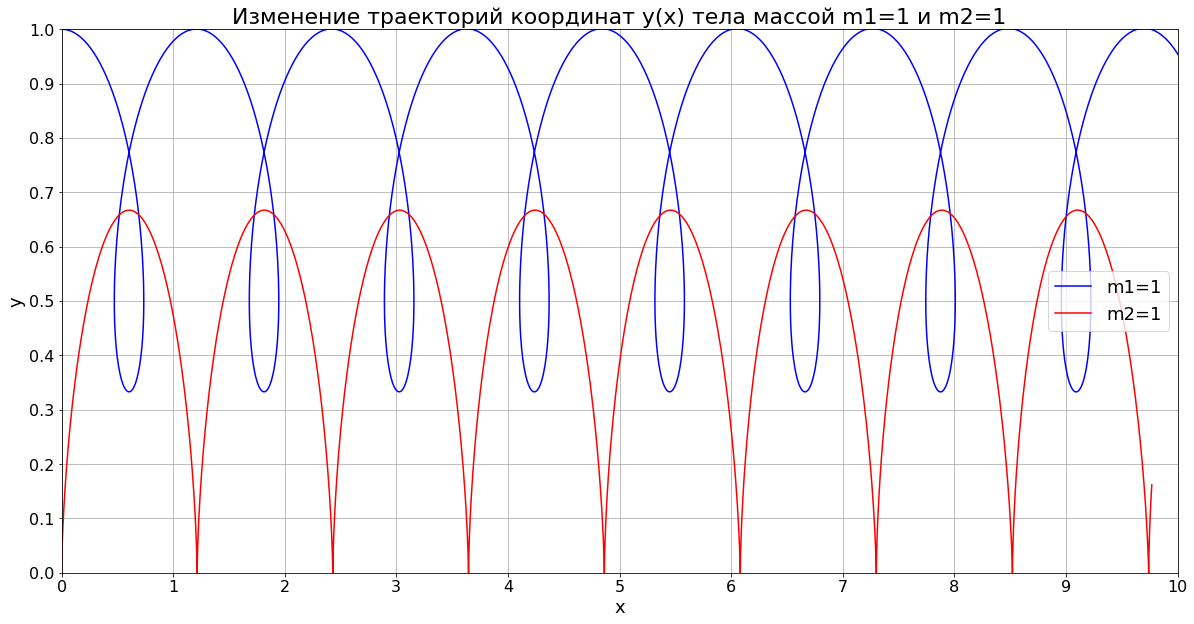

In [63]:
# График траекторий координат y(x) при m1 = 1, m2 = 1
xlim_min = 0.0
xlim_max = 10.0
ylim_min = 0.0
ylim_max = 1.0
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат y(x) тела массой m1=1 и m2=1', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(x1_1, y1_1, c = 'blue')
plt.plot(x2_1, y2_1, c = 'red')
plt.legend(['m1=1', 'm2=1'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 11), fontsize = 16);

###  $m_{1}=1 $ , $ m_{2}=10 $ , шаг  $ \tau=0.01 $ , время T = [0 ... 20]

In [64]:
m_1 = 1      # масса 1 тела
m_2 = 10     # масса 2 тела
tau = 0.01
T = 20       # время

(t_2, x1_2, y1_2, x2_2, y2_2, Vx1_2, Vy1_2, Vx2_2, Vy2_2) = PredictorCorrector_method(m_1, m_2, init_coord, init_velocity, tau, T)

In [65]:
min(x1_2), max(x1_2)

(-0.48184331206739894, 2.3936737934746373)

In [66]:
min(y1_2), max(y1_2)

(-0.6667709931839293, 1.0000009534828536)

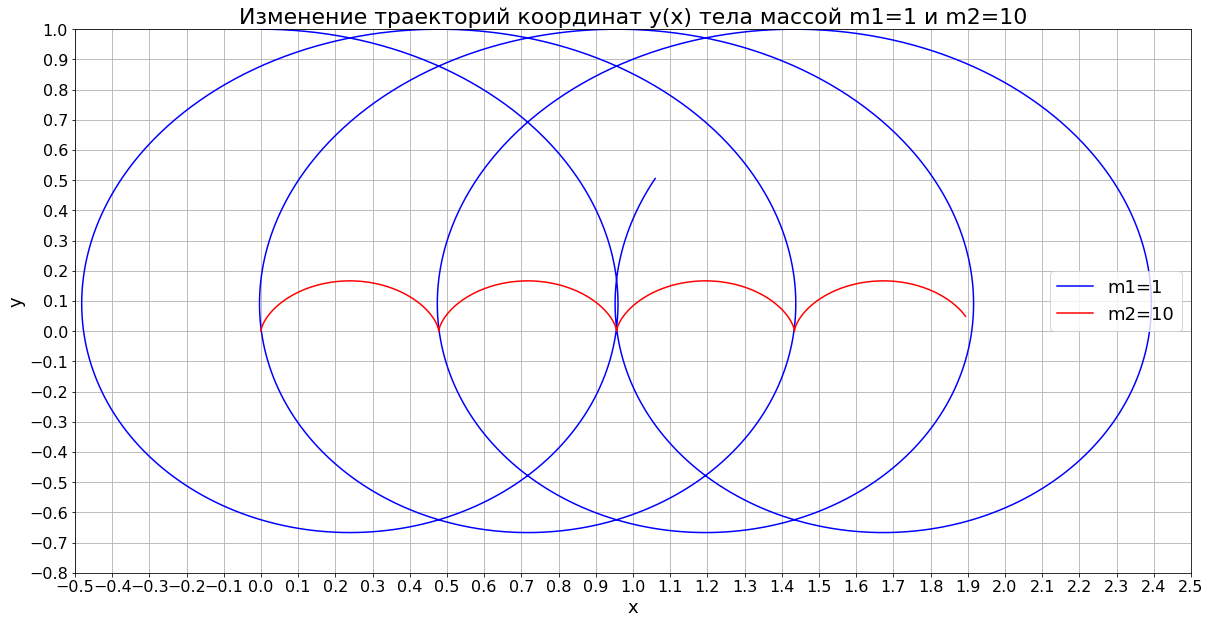

In [67]:
# График траекторий координат y(x) при m1 = 1, m2 = 10
xlim_min = -0.5
xlim_max = 2.5
ylim_min = -0.80
ylim_max = 1.0
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат y(x) тела массой m1=1 и m2=10', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(x1_2, y1_2, c = 'blue')
plt.plot(x2_2, y2_2, c = 'red')
plt.legend(['m1=1', 'm2=10'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 31), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 19), fontsize = 16);

###  $m_{1}=1 $ , $ m_{2}=100 $ , шаг  $ \tau=0.01 $ , время T = [0 ... 20]

In [68]:
m_1 = 1     # масса 1 тела
m_2 = 100   # масса 2 тела
tau = 0.01
T = 20      # время

(t_3, x1_3, y1_3, x2_3, y2_3, Vx1_3, Vy1_3, Vx2_3, Vy2_3) = PredictorCorrector_method(m_1, m_2, init_coord, init_velocity, tau, T)

In [69]:
min(x1_3), max(x1_3)

(-0.934784604299501, 1.1778671803206058)

In [70]:
min(y1_3), max(y1_3)

(-0.96086288807327, 1.000000846283476)

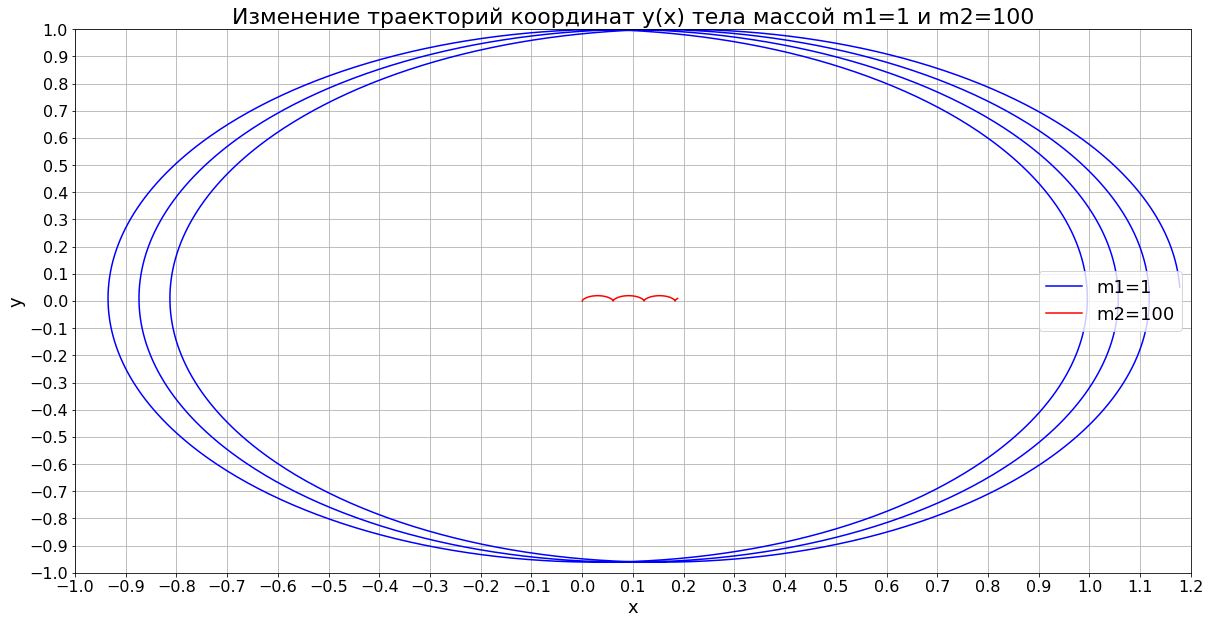

In [71]:
# График траекторий координат y(x) при m1 = 1, m2 = 100
xlim_min = -1.0
xlim_max = 1.2
ylim_min = -1.0
ylim_max = 1.0
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат y(x) тела массой m1=1 и m2=100', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(x1_3, y1_3, c = 'blue')
plt.plot(x2_3, y2_3, c = 'red')
plt.legend(['m1=1', 'm2=100'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 23), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 21), fontsize = 16);

###  $m_{1}=1 $ , $ m_{2}=1000 $ , шаг  $ \tau=0.01 $ , время T = [0 ... 20]

In [72]:
m_1 = 1     # масса 1 тела
m_2 = 1000  # масса 2 тела
tau = 0.01
T = 20      # время

(t_4, x1_4, y1_4, x2_4, y2_4, Vx1_4, Vy1_4, Vx2_4, Vy2_4) = PredictorCorrector_method(m_1, m_2, init_coord, init_velocity, tau, T)

In [73]:
min(x1_4), max(x1_4)

(-0.9933444424450183, 1.0121370088460213)

In [74]:
min(y1_4), max(y1_4)

(-0.9960822299011322, 1.0000002754658883)

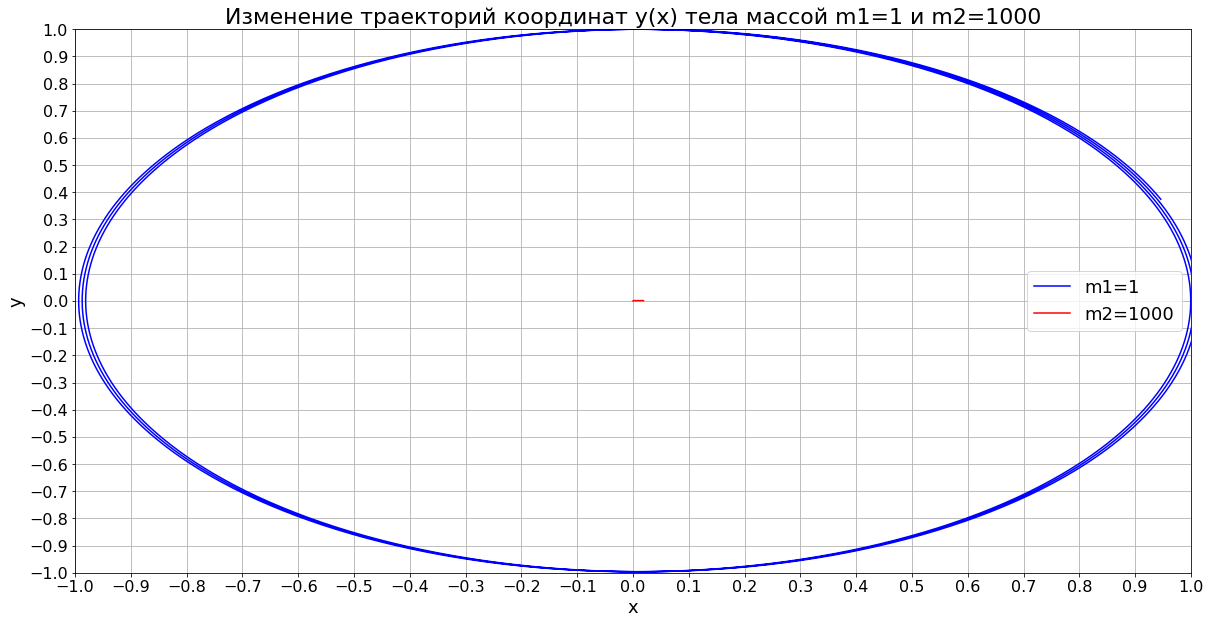

In [75]:
# График траекторий координат y(x) при m1 = 1, m2 = 1000
xlim_min = -1.0
xlim_max = 1.0
ylim_min = -1.0
ylim_max = 1.0
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Изменение траекторий координат y(x) тела массой m1=1 и m2=1000', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(x1_4, y1_4, c = 'blue')
plt.plot(x2_4, y2_4, c = 'red')
plt.legend(['m1=1', 'm2=1000'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 21), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 21), fontsize = 16);